# PATEL SMITKUMAR KAUSHIKKUMAR (CIN 306587208)
# CS 5661 : Homework 2


### Problem2: Adjusting the hyperparameters of MNIST Digit Recognition using ANN model in Keras+TensorFlow and Grid-Search in SciKitLearn:

### In this problem, we want to apply an interesting method to use the grid search capability of sklearn library to adjust the hyperparameters of Keras+Tensorflow ANN models! To do this, we use KerasClassifier class as a wrapper for Keras models and then use it in sklearn.

### Note: Please be aware that it may take a long time (hours) to finish running this code. Please start working on it early!

#### a- Download the Kears+Tensorflow tutorial from CSNS. Import all required modules including the following:
- from keras.wrappers.scikit_learn import KerasClassifier
- from sklearn.model_selection import GridSearchCV

In [1]:
# required Libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

import numpy as np


%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


Using TensorFlow backend.


#### b- Import the minst dataset, and split it into testing and training as we saw in the tutorial. 
#### Then, reshape each sample into a row vector, and scale it by dividing by 255.

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


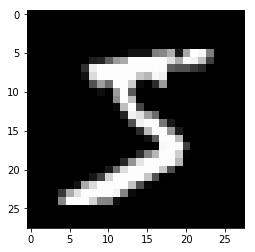

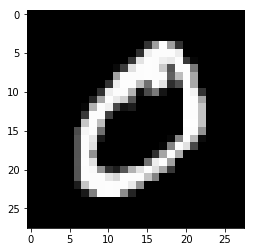

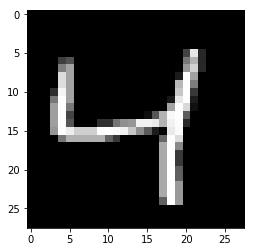

In [4]:
imgplot = plt.imshow(X_train[0,:,:],cmap=plt.cm.gray)
plt.show()
imgplot = plt.imshow(X_train[1,:,:],cmap=plt.cm.gray)
plt.show()
imgplot = plt.imshow(X_train[2,:,:],cmap=plt.cm.gray)
plt.show()

In [5]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
print (y_train.shape)
print (y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


##### c- Perform OneHotEncoding for the label y. So, your label will be a vector of 10 elements for each data sample.

In [9]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
print (y_train.shape)
print (y_train[:10,:])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


#### d- Now, define a function called model_creator. This function will define, create, and compile your neural network model according to your structure, and then return the built model as the output. For the ANN neurons/layers, use the same structure as we had in the tutorial:
    
    def model_creator():
        # define:
        model = Sequential()
        # design the structure:
        model.add(…)
        # compile:
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        # return:
        return model

In [11]:
def model_creator():
    
    model = Sequential()
   
    input_size = 784
    hidden_neurons = 100
    out_size = 10
    model.add(Dense(hidden_neurons, input_dim = input_size))
    model.add(Activation('sigmoid'))
    model.add(Dense(out_size, input_dim = hidden_neurons))  
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model 
    

#### e- Fix the random state for reproducibility:
- seed = 2, np.random.seed(seed)

In [12]:
seed = 2;
np.random.seed(2)

#### f- Use KerasClassifier class to wrap your model as an object:
- model = KerasClassifier(build_fn = model_creator, verbose=2)

In [13]:
model = KerasClassifier(build_fn = model_creator, verbose=2)

#### g- Now, run sklearn GridSearch to find the best batch_size and epochs. 
#### Search in this range: batch_size = [30 , 50 , 100 ] , epochs = [10 , 15 , 20].
#### In your GridSearch, the estimator is the above model, the scoring should be 'neg_log_loss', and you have to use 10-fold CV.

In [14]:
# https://blogs.oracle.com/meena/simple-neural-network-model-using-keras-and-grid-search-hyperparameterstuning
batch_size = [30 , 50 , 100]
epochs = [10 , 15 , 20]
param_grid = dict(epochs=epochs, batch_size=batch_size)
grid = GridSearchCV(estimator= model , param_grid=param_grid, cv=10, scoring='neg_log_loss')
grid.fit(X_train, y_train)
# print(grid.cv_results_)
print(grid.best_score_)
print(grid.best_params_)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 5s - loss: 0.4322 - acc: 0.8902
Epoch 2/10
 - 3s - loss: 0.2095 - acc: 0.9400
Epoch 3/10
 - 3s - loss: 0.1572 - acc: 0.9544
Epoch 4/10
 - 3s - loss: 0.1235 - acc: 0.9643
Epoch 5/10
 - 3s - loss: 0.0996 - acc: 0.9714
Epoch 6/10
 - 3s - loss: 0.0827 - acc: 0.9769
Epoch 7/10
 - 3s - loss: 0.0696 - acc: 0.9803
Epoch 8/10
 - 3s - loss: 0.0592 - acc: 0.9839
Epoch 9/10
 - 3s - loss: 0.0510 - acc: 0.9861
Epoch 10/10
 - 3s - loss: 0.0435 - acc: 0.9887
Epoch 1/10
 - 4s - loss: 0.4273 - acc: 0.8919
Epoch 2/10
 - 3s - loss: 0.2090 - acc: 0.9398
Epoch 3/10
 - 3s - loss: 0.1552 - acc: 0.9554
Epoch 4/10
 - 3s - loss: 0.1228 - acc: 0.9655
Epoch 5/10
 - 4s - loss: 0.1010 - acc: 0.9711
Epoch 6/10
 - 4s - loss: 0.0843 - acc: 0.9761
Epoch 7/10
 - 3s - loss: 0.0714 - acc: 0.9802
Epoch 8/10
 - 3s - loss: 0.0606 - acc: 0.9829
Epoch 9/10
 - 3s - loss: 0.0526 - acc: 0.9857
Epoch

Epoch 7/15
 - 8s - loss: 0.0713 - acc: 0.9799
Epoch 8/15
 - 7s - loss: 0.0611 - acc: 0.9830
Epoch 9/15
 - 7s - loss: 0.0521 - acc: 0.9854
Epoch 10/15
 - 7s - loss: 0.0452 - acc: 0.9880
Epoch 11/15
 - 7s - loss: 0.0386 - acc: 0.9903
Epoch 12/15
 - 7s - loss: 0.0329 - acc: 0.9920
Epoch 13/15
 - 7s - loss: 0.0283 - acc: 0.9937
Epoch 14/15
 - 7s - loss: 0.0240 - acc: 0.9952
Epoch 15/15
 - 7s - loss: 0.0208 - acc: 0.9959
Epoch 1/15
 - 8s - loss: 0.4312 - acc: 0.8901
Epoch 2/15
 - 7s - loss: 0.2069 - acc: 0.9408
Epoch 3/15
 - 7s - loss: 0.1548 - acc: 0.9560
Epoch 4/15
 - 7s - loss: 0.1225 - acc: 0.9655
Epoch 5/15
 - 7s - loss: 0.1006 - acc: 0.9710
Epoch 6/15
 - 7s - loss: 0.0838 - acc: 0.9766
Epoch 7/15
 - 7s - loss: 0.0711 - acc: 0.9802
Epoch 8/15
 - 7s - loss: 0.0602 - acc: 0.9835
Epoch 9/15
 - 7s - loss: 0.0515 - acc: 0.9860
Epoch 10/15
 - 7s - loss: 0.0446 - acc: 0.9884
Epoch 11/15
 - 7s - loss: 0.0385 - acc: 0.9901
Epoch 12/15
 - 7s - loss: 0.0333 - acc: 0.9920
Epoch 13/15
 - 7s - loss:

 - 10s - loss: 0.0285 - acc: 0.9935
Epoch 14/20
 - 9s - loss: 0.0248 - acc: 0.9947
Epoch 15/20
 - 9s - loss: 0.0207 - acc: 0.9957
Epoch 16/20
 - 9s - loss: 0.0179 - acc: 0.9965
Epoch 17/20
 - 9s - loss: 0.0152 - acc: 0.9974
Epoch 18/20
 - 9s - loss: 0.0127 - acc: 0.9982
Epoch 19/20
 - 10s - loss: 0.0106 - acc: 0.9989
Epoch 20/20
 - 10s - loss: 0.0093 - acc: 0.9990
Epoch 1/20
 - 11s - loss: 0.4272 - acc: 0.8914
Epoch 2/20
 - 10s - loss: 0.2123 - acc: 0.9400
Epoch 3/20
 - 9s - loss: 0.1607 - acc: 0.9545
Epoch 4/20
 - 9s - loss: 0.1282 - acc: 0.9630
Epoch 5/20
 - 9s - loss: 0.1061 - acc: 0.9696
Epoch 6/20
 - 8s - loss: 0.0888 - acc: 0.9750
Epoch 7/20
 - 7s - loss: 0.0756 - acc: 0.9787
Epoch 8/20
 - 8s - loss: 0.0648 - acc: 0.9814
Epoch 9/20
 - 8s - loss: 0.0557 - acc: 0.9852
Epoch 10/20
 - 8s - loss: 0.0481 - acc: 0.9874
Epoch 11/20
 - 9s - loss: 0.0416 - acc: 0.9893
Epoch 12/20
 - 8s - loss: 0.0358 - acc: 0.9911
Epoch 13/20
 - 8s - loss: 0.0312 - acc: 0.9922
Epoch 14/20
 - 8s - loss: 0.0

Epoch 10/10
 - 6s - loss: 0.0611 - acc: 0.9835
Epoch 1/10
 - 9s - loss: 0.4888 - acc: 0.8798
Epoch 2/10
 - 6s - loss: 0.2320 - acc: 0.9351
Epoch 3/10
 - 6s - loss: 0.1797 - acc: 0.9481
Epoch 4/10
 - 6s - loss: 0.1463 - acc: 0.9584
Epoch 5/10
 - 7s - loss: 0.1224 - acc: 0.9656
Epoch 6/10
 - 7s - loss: 0.1041 - acc: 0.9702
Epoch 7/10
 - 7s - loss: 0.0898 - acc: 0.9749
Epoch 8/10
 - 7s - loss: 0.0780 - acc: 0.9786
Epoch 9/10
 - 6s - loss: 0.0684 - acc: 0.9814
Epoch 10/10
 - 7s - loss: 0.0603 - acc: 0.9837
Epoch 1/10
 - 9s - loss: 0.4916 - acc: 0.8768
Epoch 2/10
 - 6s - loss: 0.2334 - acc: 0.9334
Epoch 3/10
 - 6s - loss: 0.1799 - acc: 0.9488
Epoch 4/10
 - 7s - loss: 0.1471 - acc: 0.9580
Epoch 5/10
 - 7s - loss: 0.1238 - acc: 0.9649
Epoch 6/10
 - 7s - loss: 0.1056 - acc: 0.9703
Epoch 7/10
 - 7s - loss: 0.0915 - acc: 0.9740
Epoch 8/10
 - 7s - loss: 0.0798 - acc: 0.9779
Epoch 9/10
 - 7s - loss: 0.0695 - acc: 0.9817
Epoch 10/10
 - 7s - loss: 0.0613 - acc: 0.9839
Epoch 1/10
 - 9s - loss: 0.5049

Epoch 12/15
 - 4s - loss: 0.0479 - acc: 0.9876
Epoch 13/15
 - 4s - loss: 0.0424 - acc: 0.9889
Epoch 14/15
 - 4s - loss: 0.0377 - acc: 0.9907
Epoch 15/15
 - 4s - loss: 0.0332 - acc: 0.9926
Epoch 1/20
 - 5s - loss: 0.5015 - acc: 0.8748
Epoch 2/20
 - 4s - loss: 0.2385 - acc: 0.9325
Epoch 3/20
 - 4s - loss: 0.1845 - acc: 0.9464
Epoch 4/20
 - 4s - loss: 0.1510 - acc: 0.9560
Epoch 5/20
 - 4s - loss: 0.1256 - acc: 0.9639
Epoch 6/20
 - 4s - loss: 0.1070 - acc: 0.9696
Epoch 7/20
 - 4s - loss: 0.0921 - acc: 0.9736
Epoch 8/20
 - 4s - loss: 0.0802 - acc: 0.9779
Epoch 9/20
 - 4s - loss: 0.0702 - acc: 0.9808
Epoch 10/20
 - 4s - loss: 0.0618 - acc: 0.9837
Epoch 11/20
 - 4s - loss: 0.0540 - acc: 0.9861
Epoch 12/20
 - 4s - loss: 0.0479 - acc: 0.9873
Epoch 13/20
 - 4s - loss: 0.0422 - acc: 0.9892
Epoch 14/20
 - 4s - loss: 0.0373 - acc: 0.9906
Epoch 15/20
 - 4s - loss: 0.0330 - acc: 0.9921
Epoch 16/20
 - 4s - loss: 0.0292 - acc: 0.9936
Epoch 17/20
 - 4s - loss: 0.0254 - acc: 0.9945
Epoch 18/20
 - 4s - lo

 - 4s - loss: 0.0413 - acc: 0.9899
Epoch 14/20
 - 4s - loss: 0.0364 - acc: 0.9913
Epoch 15/20
 - 5s - loss: 0.0320 - acc: 0.9930
Epoch 16/20
 - 4s - loss: 0.0284 - acc: 0.9939
Epoch 17/20
 - 4s - loss: 0.0247 - acc: 0.9950
Epoch 18/20
 - 4s - loss: 0.0219 - acc: 0.9961
Epoch 19/20
 - 4s - loss: 0.0192 - acc: 0.9965
Epoch 20/20
 - 4s - loss: 0.0168 - acc: 0.9976
Epoch 1/20
 - 6s - loss: 0.5002 - acc: 0.8774
Epoch 2/20
 - 4s - loss: 0.2394 - acc: 0.9316
Epoch 3/20
 - 4s - loss: 0.1863 - acc: 0.9466
Epoch 4/20
 - 4s - loss: 0.1512 - acc: 0.9566
Epoch 5/20
 - 4s - loss: 0.1263 - acc: 0.9641
Epoch 6/20
 - 4s - loss: 0.1072 - acc: 0.9695
Epoch 7/20
 - 4s - loss: 0.0914 - acc: 0.9747
Epoch 8/20
 - 4s - loss: 0.0792 - acc: 0.9780
Epoch 9/20
 - 4s - loss: 0.0689 - acc: 0.9809
Epoch 10/20
 - 4s - loss: 0.0602 - acc: 0.9836
Epoch 11/20
 - 4s - loss: 0.0529 - acc: 0.9863
Epoch 12/20
 - 4s - loss: 0.0465 - acc: 0.9882
Epoch 13/20
 - 4s - loss: 0.0408 - acc: 0.9893
Epoch 14/20
 - 4s - loss: 0.0359 -

Epoch 6/15
 - 3s - loss: 0.1393 - acc: 0.9605
Epoch 7/15
 - 4s - loss: 0.1227 - acc: 0.9655
Epoch 8/15
 - 3s - loss: 0.1093 - acc: 0.9694
Epoch 9/15
 - 3s - loss: 0.0971 - acc: 0.9726
Epoch 10/15
 - 3s - loss: 0.0872 - acc: 0.9755
Epoch 11/15
 - 3s - loss: 0.0785 - acc: 0.9791
Epoch 12/15
 - 3s - loss: 0.0711 - acc: 0.9809
Epoch 13/15
 - 3s - loss: 0.0646 - acc: 0.9834
Epoch 14/15
 - 3s - loss: 0.0585 - acc: 0.9847
Epoch 15/15
 - 3s - loss: 0.0534 - acc: 0.9863
Epoch 1/15
 - 6s - loss: 0.6101 - acc: 0.8544
Epoch 2/15
 - 5s - loss: 0.2812 - acc: 0.9214
Epoch 3/15
 - 3s - loss: 0.2223 - acc: 0.9380
Epoch 4/15
 - 3s - loss: 0.1856 - acc: 0.9481
Epoch 5/15
 - 3s - loss: 0.1594 - acc: 0.9555
Epoch 6/15
 - 3s - loss: 0.1397 - acc: 0.9606
Epoch 7/15
 - 4s - loss: 0.1238 - acc: 0.9654
Epoch 8/15
 - 4s - loss: 0.1098 - acc: 0.9695
Epoch 9/15
 - 4s - loss: 0.0991 - acc: 0.9721
Epoch 10/15
 - 4s - loss: 0.0892 - acc: 0.9750
Epoch 11/15
 - 5s - loss: 0.0807 - acc: 0.9783
Epoch 12/15
 - 4s - loss: 

Epoch 18/20
 - 3s - loss: 0.0406 - acc: 0.9902
Epoch 19/20
 - 3s - loss: 0.0372 - acc: 0.9911
Epoch 20/20
 - 3s - loss: 0.0339 - acc: 0.9922
Epoch 1/20
 - 6s - loss: 0.6107 - acc: 0.8564
Epoch 2/20
 - 3s - loss: 0.2790 - acc: 0.9225
Epoch 3/20
 - 3s - loss: 0.2222 - acc: 0.9376
Epoch 4/20
 - 3s - loss: 0.1869 - acc: 0.9469
Epoch 5/20
 - 3s - loss: 0.1612 - acc: 0.9542
Epoch 6/20
 - 3s - loss: 0.1409 - acc: 0.9600
Epoch 7/20
 - 3s - loss: 0.1246 - acc: 0.9644
Epoch 8/20
 - 3s - loss: 0.1112 - acc: 0.9679
Epoch 9/20
 - 3s - loss: 0.0997 - acc: 0.9720
Epoch 10/20
 - 3s - loss: 0.0900 - acc: 0.9744
Epoch 11/20
 - 3s - loss: 0.0815 - acc: 0.9773
Epoch 12/20
 - 3s - loss: 0.0735 - acc: 0.9799
Epoch 13/20
 - 3s - loss: 0.0672 - acc: 0.9814
Epoch 14/20
 - 3s - loss: 0.0609 - acc: 0.9840
Epoch 15/20
 - 3s - loss: 0.0557 - acc: 0.9857
Epoch 16/20
 - 3s - loss: 0.0509 - acc: 0.9873
Epoch 17/20
 - 3s - loss: 0.0468 - acc: 0.9886
Epoch 18/20
 - 3s - loss: 0.0425 - acc: 0.9896
Epoch 19/20
 - 3s - lo

#### h- Based on your results, what is the best batch_size and epochs?
#### Now, test your model with the best batch_size and epochs on the testing set.
#### grid.best_estimator_.model gives you the best model found and trained in the gridsearch.
#### What is the prediction accuracy on the testing set?

- best_score_ :  -0.08887091589986978
- best_params_ :  {'batch_size': 50, 'epochs': 20}

In [16]:
batch_size = [50]
epochs = [20]
param_grid = dict(epochs=epochs, batch_size=batch_size)
grid = GridSearchCV(estimator= model , param_grid=param_grid, cv=10, scoring='neg_log_loss')
grid.fit(X_test, y_test)
# print(grid.cv_results_)
print(grid.best_score_)
print(grid.best_params_)

Epoch 1/20
 - 9s - loss: 1.0916 - acc: 0.7641
Epoch 2/20
 - 2s - loss: 0.4776 - acc: 0.8889
Epoch 3/20
 - 2s - loss: 0.3543 - acc: 0.9103
Epoch 4/20
 - 2s - loss: 0.2975 - acc: 0.9200
Epoch 5/20
 - 2s - loss: 0.2607 - acc: 0.9288
Epoch 6/20
 - 2s - loss: 0.2339 - acc: 0.9340
Epoch 7/20
 - 2s - loss: 0.2115 - acc: 0.9409
Epoch 8/20
 - 2s - loss: 0.1926 - acc: 0.9467
Epoch 9/20
 - 2s - loss: 0.1766 - acc: 0.9521
Epoch 10/20
 - 2s - loss: 0.1617 - acc: 0.9561
Epoch 11/20
 - 2s - loss: 0.1490 - acc: 0.9594
Epoch 12/20
 - 2s - loss: 0.1371 - acc: 0.9649
Epoch 13/20
 - 2s - loss: 0.1261 - acc: 0.9674
Epoch 14/20
 - 2s - loss: 0.1169 - acc: 0.9713
Epoch 15/20
 - 2s - loss: 0.1072 - acc: 0.9737
Epoch 16/20
 - 2s - loss: 0.0993 - acc: 0.9763
Epoch 17/20
 - 2s - loss: 0.0911 - acc: 0.9781
Epoch 18/20
 - 2s - loss: 0.0842 - acc: 0.9809
Epoch 19/20
 - 2s - loss: 0.0771 - acc: 0.9829
Epoch 20/20
 - 2s - loss: 0.0715 - acc: 0.9843
Epoch 1/20
 - 8s - loss: 1.0725 - acc: 0.7797
Epoch 2/20
 - 2s - loss

 - 2s - loss: 0.0962 - acc: 0.9768
Epoch 18/20
 - 2s - loss: 0.0893 - acc: 0.9788
Epoch 19/20
 - 2s - loss: 0.0820 - acc: 0.9813
Epoch 20/20
 - 2s - loss: 0.0756 - acc: 0.9829
Epoch 1/20
 - 8s - loss: 1.0757 - acc: 0.7709
Epoch 2/20
 - 2s - loss: 0.4751 - acc: 0.8906
Epoch 3/20
 - 2s - loss: 0.3551 - acc: 0.9103
Epoch 4/20
 - 2s - loss: 0.2963 - acc: 0.9228
Epoch 5/20
 - 2s - loss: 0.2598 - acc: 0.9307
Epoch 6/20
 - 2s - loss: 0.2321 - acc: 0.9387
Epoch 7/20
 - 2s - loss: 0.2108 - acc: 0.9433
Epoch 8/20
 - 2s - loss: 0.1901 - acc: 0.9487
Epoch 9/20
 - 2s - loss: 0.1749 - acc: 0.9527
Epoch 10/20
 - 2s - loss: 0.1593 - acc: 0.9563
Epoch 11/20
 - 2s - loss: 0.1473 - acc: 0.9608
Epoch 12/20
 - 2s - loss: 0.1349 - acc: 0.9636
Epoch 13/20
 - 2s - loss: 0.1252 - acc: 0.9674
Epoch 14/20
 - 2s - loss: 0.1146 - acc: 0.9711
Epoch 15/20
 - 2s - loss: 0.1059 - acc: 0.9734
Epoch 16/20
 - 2s - loss: 0.0972 - acc: 0.9751
Epoch 17/20
 - 2s - loss: 0.0899 - acc: 0.9784
Epoch 18/20
 - 2s - loss: 0.0822 -

In [19]:
print(grid.best_estimator_.model)